# Rascunho Notebook 2

### Andressa Wille
#### Notebook 2: object selection
Plots:  Distribuições de magnitudes;
Distribuições de magnitude errors;
Distribuições de cores;
Distribuições de photo-z;
Distribuições de photo-z error;
Number counts normalizados com referências da literatura (vide product log);
Plot magnitude X error;
Plot magnitude X redshift;
Color-magnitude diagrams;
Color-color diagrams.


Dados: VAC 6850

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl
from astropy.table import Table
import sys
from funcs import * 

In [62]:
vac = get_vac(pid='6850',
            vac_schema='cluster', 
            bands=['g', 'r', 'i', 'z', 'y'],
            sample_frac = 0.1)

In [63]:
vac.describe()

,ra,dec,hpix_4096,z_best,err_z,mag_g,magerr_g,mag_r,magerr_r,mag_i,magerr_i,mag_z,magerr_z,mag_y,magerr_y
count,234313.000000,234313.000000,2.343130e+05,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000,234313.000000
mean,35.433238,-5.269687,8.103388e+07,0.783535,0.332928,24.086401,0.207808,23.386085,0.128456,22.908405,0.130771,22.656106,0.191757,23.297057,0.916425
std,1.954136,1.379239,2.444346e+07,0.293512,0.520288,1.230276,0.504003,1.221255,0.185098,1.198930,0.177396,1.280137,0.224780,3.543228,243.153771
min,30.952258,-8.378785,7.236813e+07,0.000184,0.000507,11.631841,0.000113,10.763838,0.000186,10.287158,0.000330,10.180618,0.000358,10.293195,-30147.212557
25%,33.836649,-6.394074,7.242232e+07,0.559495,0.165893,23.531683,0.074477,22.854761,0.054047,22.352917,0.055429,22.013378,0.072498,21.872455,0.150443
50%,35.463821,-5.148335,7.246052e+07,0.787129,0.290915,24.199548,0.131508,23.669847,0.104631,23.240314,0.113076,22.918949,0.151159,22.752160,0.341020
75%,37.088617,-4.177461,7.251344e+07,1.000049,0.414097,24.775376,0.214235,24.193733,0.164250,23.802482,0.176405,23.541673,0.253384,23.527885,0.633274
max,39.365698,-2.395289,1.507164e+08,1.996409,60.414130,29.975748,29.055290,28.107580,18.974529,24.250000,18.523485,26.179017,18.540951,37.500000,109805.277855


In [64]:
bands = ['g', 'r', 'i', 'z', 'y']
colors = ['g-r', 'r-i', 'i-z', 'z-y']

### Distribuição de magnitudes

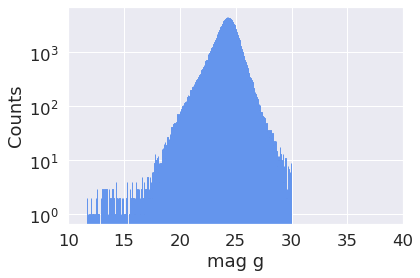

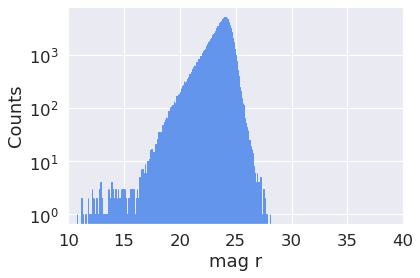

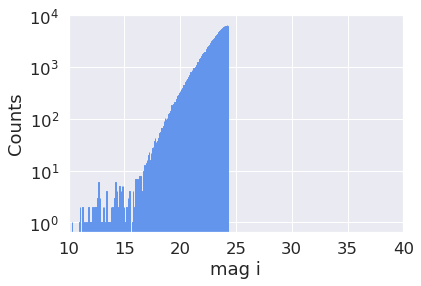

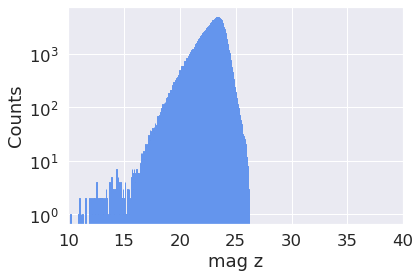

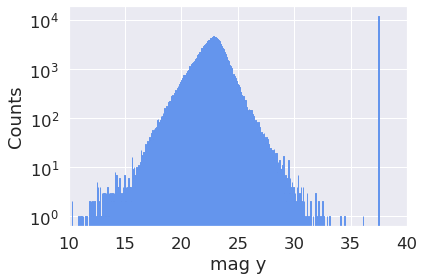

In [65]:
for i, band in enumerate(bands):
    plt.figure()
    plt.hist(vac[f'mag_{band}'], histtype='bar', bins='auto', ec="cornflowerblue")
    plt.xlabel("mag "+band)
    plt.ylabel("Counts")
    plt.xlim(10, 40)
    plt.yscale('log')
plt.tight_layout()

### Distribuição de erros nas magnitudes

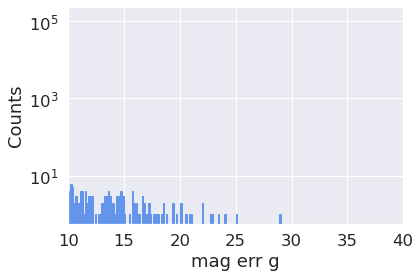

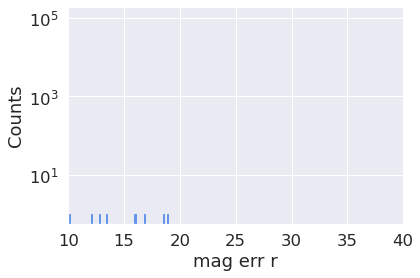

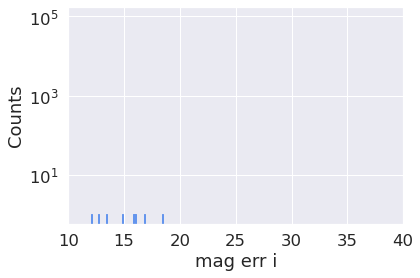

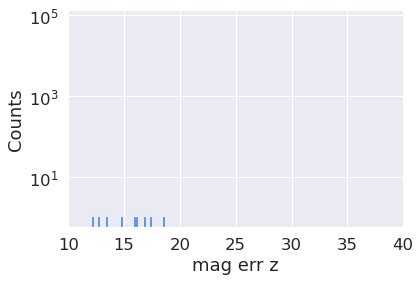

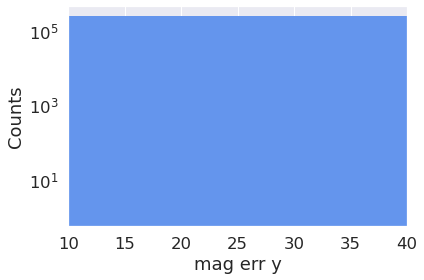

In [66]:
# mag y??
for i, band in enumerate(bands):
    plt.figure()
    plt.hist(vac[f'magerr_{band}'], bins=200, ec="cornflowerblue", fc="cornflowerblue")
    plt.xlabel("mag err "+band)
    plt.ylabel("Counts")
    plt.xlim(10, 40)
    plt.yscale('log')
    plt.grid(True)
pl.tight_layout()

### Distribuição de cores

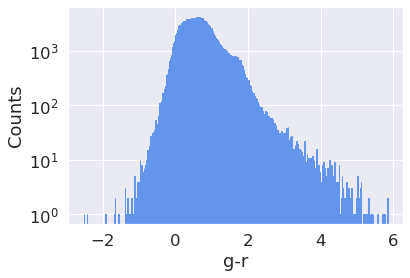

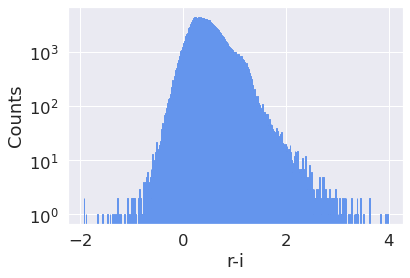

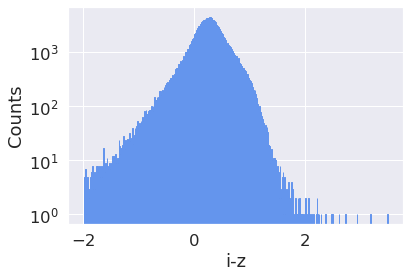

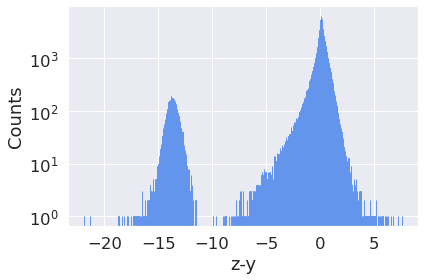

In [67]:
for i, band in enumerate(colors):
    plt.figure() 
    vac[colors[i]] = vac[f'mag_{bands[i]}'] - vac[f'mag_{bands[i+1]}']
    plt.hist(vac[colors[i]], bins='auto', ec="cornflowerblue")
    plt.xlabel(band)
    plt.ylabel("Counts")
    plt.yscale('log')
    #plt.grid(True)
plt.tight_layout()

### Distribuição de photo z

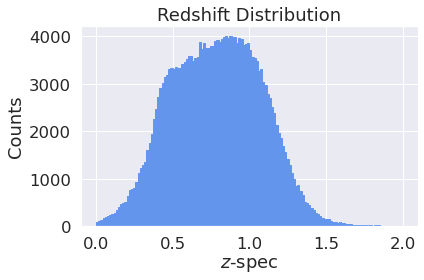

In [68]:
plt.hist(vac['z_best'], bins='auto', ec="cornflowerblue", fc="cornflowerblue")
plt.xlabel("$z$-spec")
plt.ylabel("Counts")
plt.title("Redshift Distribution")
plt.tight_layout()

### Distribuição de erro no photo z

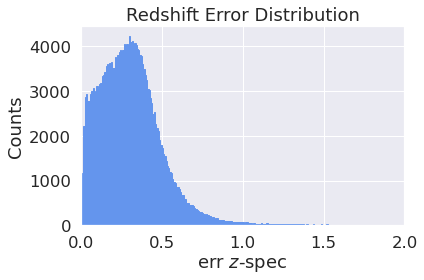

In [69]:
plt.hist(vac['err_z'], bins='auto', ec="cornflowerblue", fc="cornflowerblue")
plt.xlabel("err $z$-spec")
plt.ylabel("Counts")
plt.xlim(0, 2)
plt.title("Redshift Error Distribution")
plt.tight_layout()

### Number counts

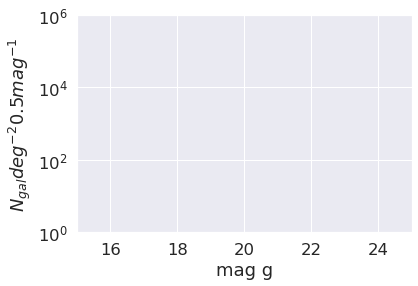

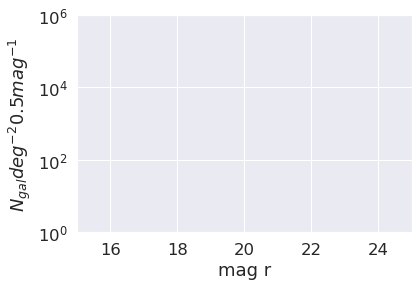

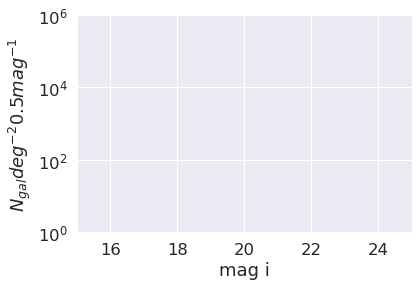

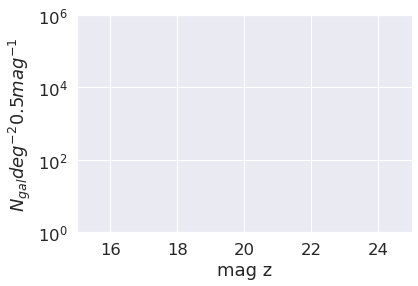

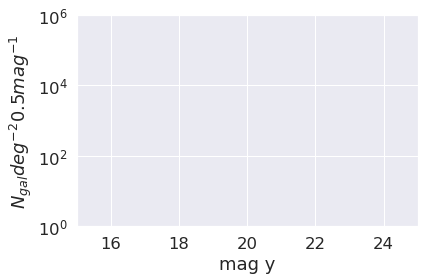

In [70]:
#??
#Footprint area [sq deg] = 29.05
counts =['g', 'r', 'i', 'z', 'y']
area = 29.05
mag = 0.5
mag_area = area * mag
for i, band in enumerate(bands):
    counts[i] = vac[f'mag_{band}']/ mag_area
    plt.figure()
    plt.hist(counts[i], histtype='step', bins=50, color='black')
    plt.xlabel("mag "+band)
    plt.ylabel("$N_{gal} deg^{-2}0.5mag^{-1}$")
    plt.xlim(15, 25)
    plt.ylim(10e-1, 10e5)
    plt.yscale('log')
plt.tight_layout()

### Plot magnitudes x erro 

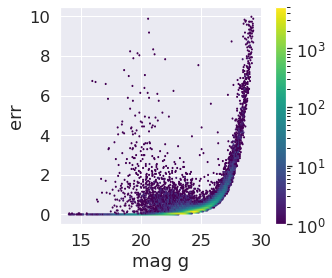

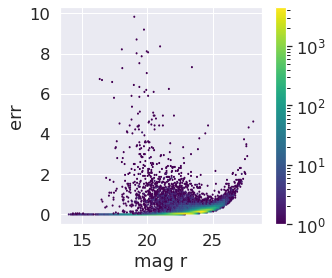

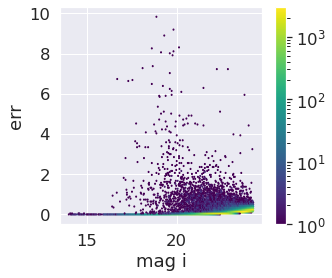

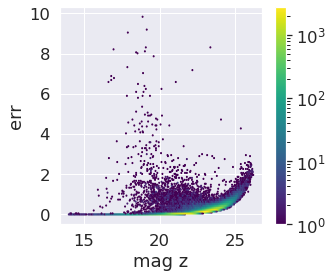

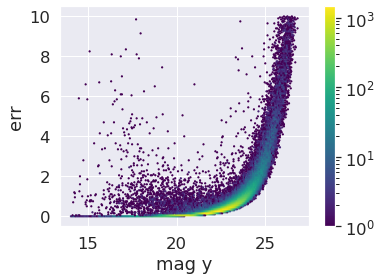

In [81]:
for i, band in enumerate(bands):
    pl.figure(figsize=[10,4])
    pl.subplot(121) 
    mag = np.array(vac[f'mag_{band}'])
    err = np.array(vac[f'magerr_{band}'])
    mask = (mag>14)&(mag<32)&(err<10)
    #MASCARA?
    pl.hexbin(mag[mask], err[mask],None,  mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = pl.colorbar()
    pl.xlabel("mag "+band)
    pl.ylabel("err")
    pl.grid(True)
pl.tight_layout()

### Plot magnitudes x redshift

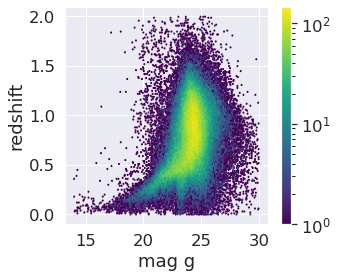

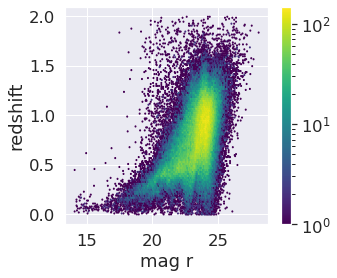

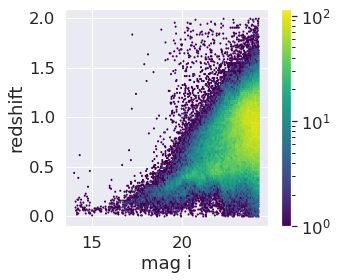

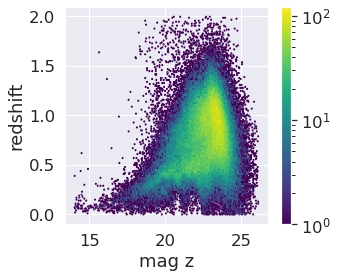

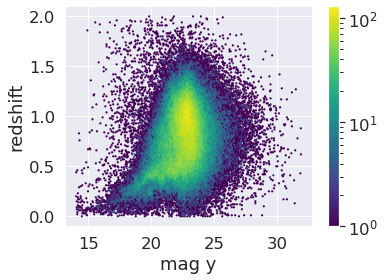

In [80]:
for i, band in enumerate(bands):
    pl.figure(figsize=[10,4])
    pl.subplot(121) 
    mag = np.array(vac[f'mag_{band}'])
    z = np.array(vac['z_best'])
    mask = (mag>14)&(mag<32)&(z<=2)
    pl.hexbin(mag[mask], z[mask], None,  mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = pl.colorbar()
    pl.xlabel("mag "+band)
    pl.ylabel("redshift")
    pl.grid(True)
pl.tight_layout()

### CMD

In [73]:
vacs = [vac]
titles = ["VAC 6850"]

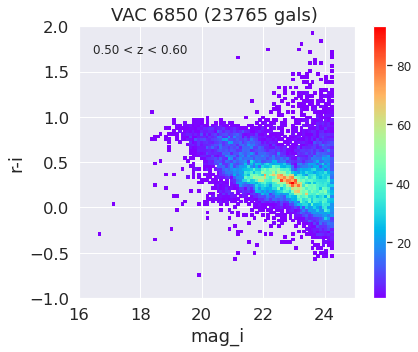

In [74]:
x, y = 'mag_i', 'r-i'
z_low, z_up = 0.5, 0.6
color_cut = 0.65
x_range, y_range = [16,25], [-1., 2]


plot_loop(vacs, x, y, z_low, z_up, color_cut, x_range, y_range, titles)

### CCD

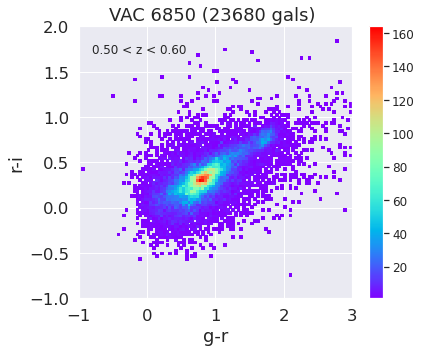

In [75]:

x, y = 'g-r', 'r-i'
z_low, z_up = 0.5, 0.6
color_cut = 0.65
x_range, y_range = [-1.,3], [-1., 2]
x_label, y_label = x, y

plot_loop(vacs, x, y, z_low, z_up, color_cut, x_range, y_range, titles)


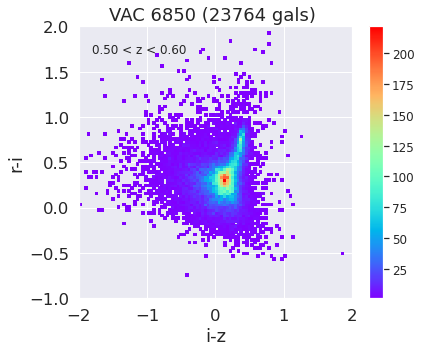

In [76]:
x, y = 'i-z', 'r-i'
z_low, z_up = 0.5, 0.6
color_cut = 0.65
x_range, y_range = [-2.,2], [-1., 2]
x_label, y_label = x, y

plot_loop(vacs, x, y, z_low, z_up, color_cut, x_range, y_range, titles)

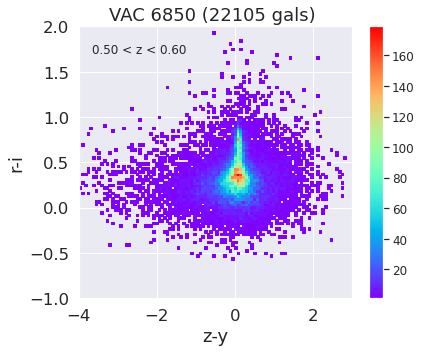

In [77]:
x, y = 'z-y', 'r-i'
z_low, z_up = 0.5, 0.6
color_cut = 0.65
x_range, y_range = [-4.,3], [-1., 2]
x_label, y_label = x, y

plot_loop(vacs, x, y, z_low, z_up, color_cut, x_range, y_range, titles)